In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
import glob
file_name = glob.glob("/Users/gaozhiping/Desktop/FitBit/*.xls")
file_name

['/Users/gaozhiping/Desktop/FitBit/Crude_Oil_BE.xls',
 '/Users/gaozhiping/Desktop/FitBit/Conventional_Gas_GC.xls',
 '/Users/gaozhiping/Desktop/FitBit/Conventional_Gas_NYH.xls',
 '/Users/gaozhiping/Desktop/FitBit/Propane_TEX.xls',
 '/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_LA.xls',
 '/Users/gaozhiping/Desktop/FitBit/No2HeatingOil_NYH.xls',
 '/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_NYH.xls',
 '/Users/gaozhiping/Desktop/FitBit/RBOBRegularGasoline_LA.xls',
 '/Users/gaozhiping/Desktop/FitBit/Kerosene-Type_GC.xls',
 '/Users/gaozhiping/Desktop/FitBit/Crude_Oil_OK.xls',
 '/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_GC.xls']

/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


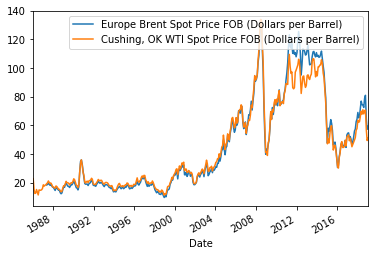

In [3]:
df1 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Crude_Oil_BE.xls', sheetname='Data 1',header=2)
df2 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Crude_Oil_OK.xls', sheetname='Data 1',header=2)
#df1["Date"] = df1['Date'].astype('datetime64[ns]')
#df2["Date"] = df2['Date'].astype('datetime64[ns]')
df_CurdeOil = df1.set_index("Date").join(df2.set_index("Date"),on="Date",how="outer")
#Draw trend graph of Crude Oil price.
df_CurdeOil.plot()

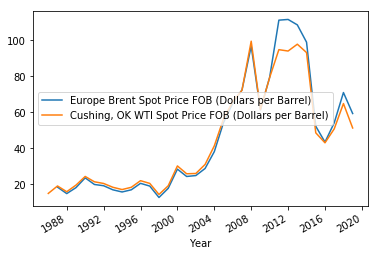

In [295]:
df1["Year"] = df1['Date'].astype('datetime64[Y]')
df1_Yesrly = df1.groupby("Year").mean()
df2["Year"] = df2['Date'].astype('datetime64[Y]')
df2_Yesrly = df2.groupby("Year").mean()
df_CurdeOil_Yesrly = df1_Yesrly.join(df2_Yesrly,on="Year",how="outer")
df_CurdeOil_Yesrly[["Europe Brent Spot Price FOB (Dollars per Barrel)","Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]].plot()

In [303]:
df_CurdeOil["diff"] = df_CurdeOil["Europe Brent Spot Price FOB (Dollars per Barrel)"] - \
                      df_CurdeOil["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]

Negative_Rate = df_CurdeOil[df_CurdeOil["diff"] < 0].count()/df_CurdeOil.count()

In [320]:
df_CurdeOil.describe()
df_CurdeOil.hist()

Europe Brent Spot Price FOB (Dollars per Barrel)  \
count                                        381.000000   
mean                                          46.000394   
std                                           33.013959   
min                                            9.820000   
25%                                           18.670000   
50%                                           30.200000   
75%                                           67.490000   
max                                          132.720000   

       Cushing, OK WTI Spot Price FOB (Dollars per Barrel)        diff  
count                                         397.000000    381.000000  
mean                                           43.808791      1.018058  
std                                            29.460501      5.456694  
min                                            11.350000     -6.880000  
25%                                            19.660000     -1.700000  
50%                                            29.840000     -1.100000  
75%                                            63.800000      1.340000  
max                                           133.880000     27.310000

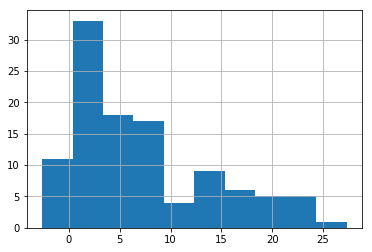

In [321]:
df_CurdeOil[df_CurdeOil.index > "2010-01-01"].describe()
df_CurdeOil[df_CurdeOil.index > "2010-01-01"]["diff"].hist()

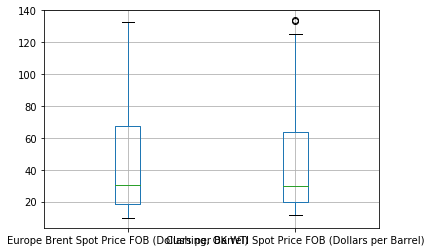

In [297]:
df_CurdeOil[["Europe Brent Spot Price FOB (Dollars per Barrel)","Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]].boxplot()

In [210]:
df3 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Conventional_Gas_GC.xls', sheetname='Data 1',header=2)
df4 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Conventional_Gas_NYH.xls', sheetname='Data 1',header=2)
df3["Date"] = df3['Date'].astype('datetime64[ns]')
df4["Date"] = df4['Date'].astype('datetime64[ns]')
df_Conventional_Gas = df3.set_index("Date").join(df4.set_index("Date"),on="Date",how="outer")

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


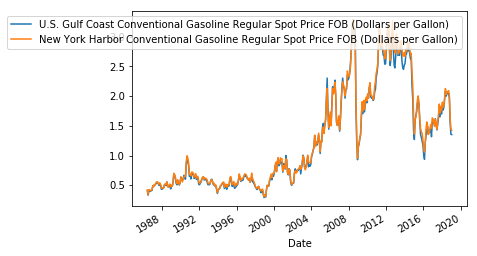

In [211]:
df_Conventional_Gas.plot()

In [324]:
df_Conventional_Gas["diff"] = df_Conventional_Gas["U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)"] - \
                              df_Conventional_Gas["New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)"]

df_Conventional_Gas[df_Conventional_Gas["diff"] > 0].count()
#df_Conventional_Gas[df_Conventional_Gas["diff"] < 0].count()


U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)    77
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)    77
diff                                                                                 77
dtype: int64

In [354]:
df_Conventional_Gas.describe()

U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
count                                         392.000000                                   
mean                                            1.238556                                   
std                                             0.813193                                   
min                                             0.294000                                   
25%                                             0.548750                                   
50%                                             0.863500                                   
75%                                             1.866000                                   
max                                             3.284000                                   

       New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
count                                         392.000000                                   
mean                                            1.267541                                   
std                                             0.829709                                   
min                                             0.307000                                   
25%                                             0.556750                                   
50%                                             0.886500                                   
75%                                             1.919250                                   
max                                             3.292000                                   

             diff  
count  392.000000  
mean    -0.028985  
std      0.054147  
min     -0.295000  
25%     -0.045000  
50%     -0.020000  
75%     -0.002750  
max      0.333000

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


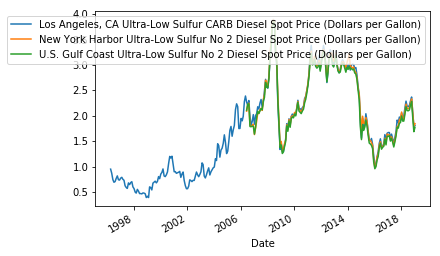

In [364]:
df5 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_LA.xls', sheetname='Data 1',header=2)
df6 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_NYH.xls', sheetname='Data 1',header=2)
df7 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_GC.xls', sheetname='Data 1',header=2)
df5["Date"] = df5['Date'].astype('datetime64[ns]')
df6["Date"] = df6['Date'].astype('datetime64[ns]')
df7["Date"] = df7['Date'].astype('datetime64[ns]')
df_Ultra_Low = df5.set_index("Date").join(df6.set_index("Date"),on="Date",how="outer").\
                      join(df7.set_index("Date"),on="Date",how="outer")
df_Ultra_Low.plot()

In [475]:
df_Ultra_Low[df_Ultra_Low['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'].notnull()].describe()
#df_Ultra_Low.columns

Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)  \
count                                         152.000000                              
mean                                            2.309184                              
std                                             0.661295                              
min                                             1.033000                              
25%                                             1.811250                              
50%                                             2.181000                              
75%                                             2.954500                              
max                                             3.894000                              

       New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
count                                         152.000000                              
mean                                            2.291855                              
std                                             0.672420                              
min                                             0.979000                              
25%                                             1.794750                              
50%                                             2.138000                              
75%                                             2.959000                              
max                                             3.887000                              

       U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
count                                         152.000000                              
mean                                            2.244559                              
std                                             0.667094                              
min                                             0.958000                              
25%                                             1.768750                              
50%                                             2.105000                              
75%                                             2.914000                              
max                                             3.851000                              

           diff_1      diff_2      diff_3  
count  152.000000  152.000000  152.000000  
mean     0.017329    0.064625    0.047296  
std      0.071249    0.053006    0.042874  
min     -0.205000   -0.098000   -0.079000  
25%     -0.019000    0.035750    0.028750  
50%      0.020500    0.062000    0.041000  
75%      0.053750    0.091250    0.054000  
max      0.247000    0.232000    0.254000

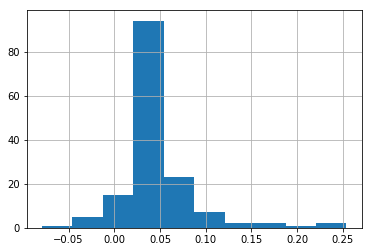

In [369]:
#df_Ultra_Low.describe()
df_Ultra_Low["diff_3"].hist()

In [372]:
df_Ultra_Low["diff_1"] = df_Ultra_Low["Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)"] - \
                              df_Ultra_Low['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)']

df_Ultra_Low["diff_2"] = df_Ultra_Low["Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)"] - \
                              df_Ultra_Low['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)']

df_Ultra_Low[df_Ultra_Low["diff_1"] > 0][df_Ultra_Low["diff_2"] > 0].count()

df_Ultra_Low["diff_3"] = df_Ultra_Low["New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)"] - \
                              df_Ultra_Low['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)']

#df_Ultra_Low[df_Ultra_Low["diff_2"] <= 0][df_Ultra_Low["diff_3"] <= 0].count()



#df_Ultra_Low.count()
df_Ultra_Low[df_Ultra_Low["diff_1"] > 0][df_Ultra_Low["diff_2"] > 0].count()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)    101
New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)    101
U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)    101
diff_1                                                                          101
diff_2                                                                          101
diff_3                                                                          101
dtype: int64

In [214]:
df8 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/No2HeatingOil_NYH.xls', sheetname='Data 1',header=2)
df_NYH = df6.set_index("Date").join(df4.set_index("Date"),on="Date",how="outer").\
                      join(df8.set_index("Date"),on="Date",how="outer")

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [402]:
df_NYH[df_NYH["New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)"].notnull()].describe()

New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
count                                         152.000000                              
mean                                            2.291855                              
std                                             0.672420                              
min                                             0.979000                              
25%                                             1.794750                              
50%                                             2.138000                              
75%                                             2.959000                              
max                                             3.887000                              

       New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
count                                         152.000000                                   
mean                                            2.144033                                   
std                                             0.590988                                   
min                                             0.956000                                   
25%                                             1.631750                                   
50%                                             2.039000                                   
75%                                             2.737000                                   
max                                             3.292000                                   

       New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)  \
count                                         152.000000                       
mean                                            2.202934                       
std                                             0.666848                       
min                                             0.939000                       
25%                                             1.675000                       
50%                                             2.038500                       
75%                                             2.888750                       
max                                             3.801000                       

           diff_1      diff_2      diff_3  
count  152.000000  152.000000  152.000000  
mean     0.147822    0.088921   -0.058901  
std      0.182728    0.049318    0.183651  
min     -0.201000    0.012000   -0.611000  
25%      0.024500    0.057750   -0.156750  
50%      0.116500    0.081000   -0.031500  
75%      0.248750    0.110250    0.058000  
max      0.749000    0.282000    0.361000

In [414]:
df_NYH["diff_1"] = df_NYH['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'] - \
                              df_NYH['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)']

df_NYH["diff_2"] = df_NYH['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'] - \
                              df_NYH['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)']

df_NYH[df_NYH["diff_1"] > 0][df_NYH["diff_2"] > 0].count()

df_NYH["diff_3"] = df_NYH['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'] - \
                              df_NYH['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)']

#df_Ultra_Low[df_Ultra_Low["diff_2"] <= 0][df_Ultra_Low["diff_3"] <= 0].count()



#df_Ultra_Low.count()
df_NYH[df_NYH["diff_2"] <= 0][df_NYH["diff_3"] <= 0].count()

df_NYH.count()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)         152
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)    392
New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)                392
diff_1                                                                               152
diff_2                                                                               152
diff_3                                                                               392
dtype: int64

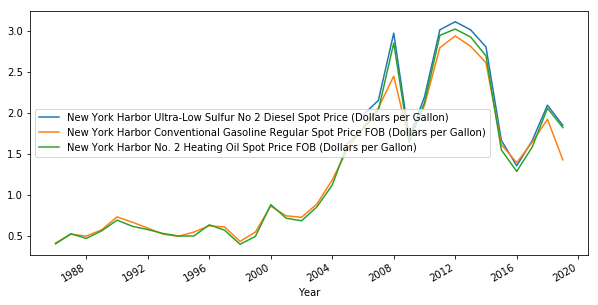

In [388]:
df_NYH.describe()
df6["Year"] = df6['Date'].astype('datetime64[Y]')
df6_Yesrly = df6.groupby("Year").mean()
df4["Year"] = df4['Date'].astype('datetime64[Y]')
df4_Yesrly = df4.groupby("Year").mean()
df8["Year"] = df8['Date'].astype('datetime64[Y]')
df8_Yesrly = df8.groupby("Year").mean()
df_NYH_Yearly = df6_Yesrly.join(df4_Yesrly,on="Year",how="outer").\
                      join(df8_Yesrly,on="Year",how="outer")
df_NYH_Yearly.plot()

In [403]:
df9 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Kerosene-Type_GC.xls', sheetname='Data 1',header=2)
df_GC = df3.set_index("Date").join(df7.set_index("Date"),on="Date",how="outer").\
                      join(df9.set_index("Date"),on="Date",how="outer")

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


ValueError: columns overlap but no suffix specified: Index(['Year'], dtype='object')

In [408]:
df_GC.describe()
df_GC[df_GC["U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)"].notnull()].describe()

U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
count                                         152.000000                                   
mean                                            2.088974                                   
std                                             0.585493                                   
min                                             0.930000                                   
25%                                             1.596000                                   
50%                                             2.001500                                   
75%                                             2.611500                                   
max                                             3.284000                                   

       U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)  \
count                                         152.000000                              
mean                                            2.244559                              
std                                             0.667094                              
min                                             0.958000                              
25%                                             1.768750                              
50%                                             2.105000                              
75%                                             2.914000                              
max                                             3.851000                              

       U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)  
count                                         152.000000                           
mean                                            2.225816                           
std                                             0.687885                           
min                                             0.930000                           
25%                                             1.709500                           
50%                                             2.095000                           
75%                                             2.885750                           
max                                             3.886000

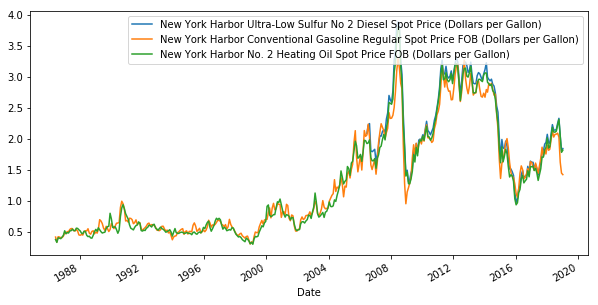

In [387]:
df_GC.plot()

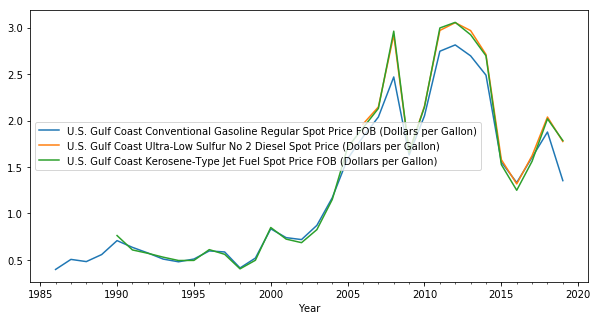

In [409]:
df3["Year"] = df3['Date'].astype('datetime64[Y]')
df3_Yesrly = df3.groupby("Year").mean()
df7["Year"] = df7['Date'].astype('datetime64[Y]')
df7_Yesrly = df7.groupby("Year").mean()
df9["Year"] = df9['Date'].astype('datetime64[Y]')
df9_Yesrly = df9.groupby("Year").mean()
df_GC_Yearly = df3_Yesrly.join(df7_Yesrly,on="Year",how="outer").\
                      join(df9_Yesrly,on="Year",how="outer")
df_GC_Yearly.plot()

In [410]:
df_GC.columns

Index(['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
       'U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
       'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)'],
      dtype='object')

In [418]:
df_GC["diff_1"] = df_GC['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'] - \
                              df_GC['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)']

df_GC["diff_2"] = df_GC['U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'] - \
                              df_GC['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)']

df_GC[df_NYH["diff_1"] > 0][df_GC["diff_2"] > 0].count()

df_GC["diff_3"] = df_GC['U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'] - \
                              df_GC['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)']

#df_Ultra_Low[df_Ultra_Low["diff_2"] <= 0][df_Ultra_Low["diff_3"] <= 0].count()



#df_Ultra_Low.count()
df_GC[df_GC["diff_2"] > 0][df_GC["diff_1"] > 0].count()



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)    25
U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)         25
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)           25
diff_1                                                                               25
diff_2                                                                               25
diff_3                                                                               25
dtype: int64

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


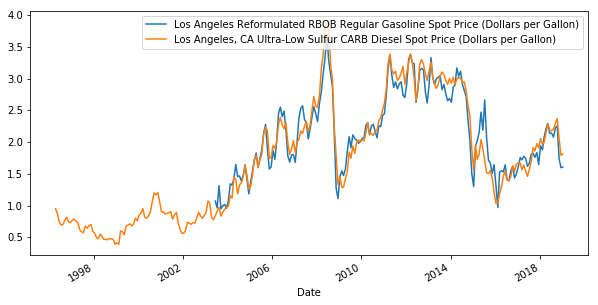

In [419]:
df10 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/RBOBRegularGasoline_LA.xls', sheetname='Data 1',header=2)
df_LA = df10.set_index("Date").join(df5.set_index("Date"),on="Date",how="outer")
df_LA.plot()

In [424]:
df_LA[df_LA["Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)"].notnull()].describe()
df_LA[df_LA["Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)"] <= \
     df_LA["Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)"]].count()

Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)    99
Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)      99
dtype: int64

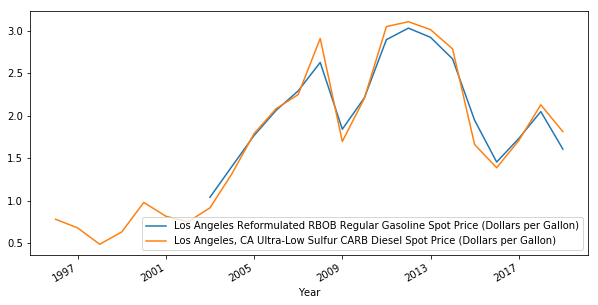

In [422]:
df10["Year"] = df10['Date'].astype('datetime64[Y]')
df10_Yesrly = df10.groupby("Year").mean()
df5["Year"] = df5['Date'].astype('datetime64[Y]')
df5_Yesrly = df5.groupby("Year").mean()
df_LA_Yearly = df10_Yesrly.join(df5_Yesrly,on="Year",how="outer")
df_LA_Yearly.plot()

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


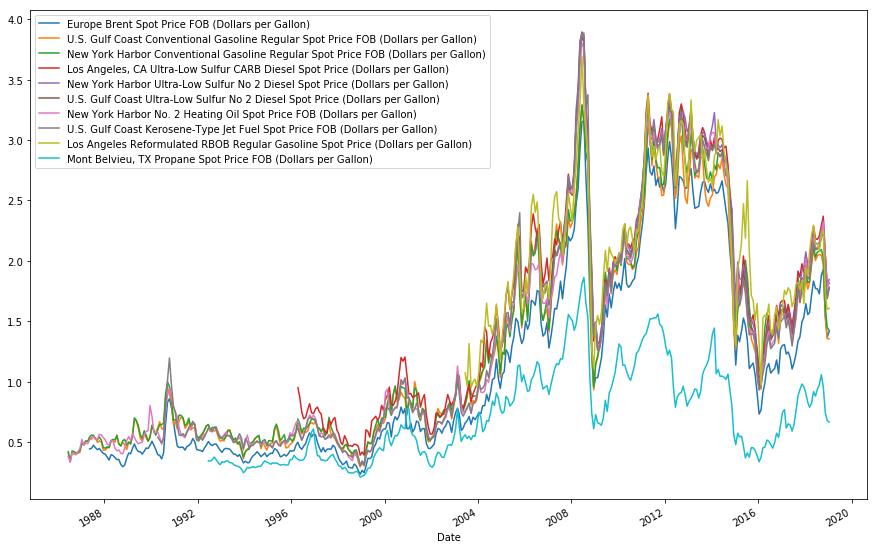

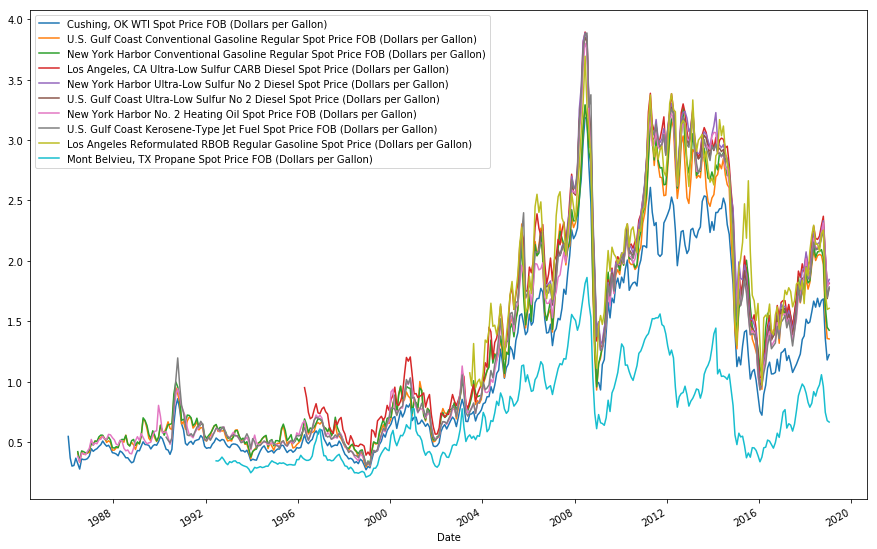

In [471]:
df1 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Crude_Oil_BE.xls', sheetname='Data 1',header=2)
df2 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Crude_Oil_OK.xls', sheetname='Data 1',header=2)
df3 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Conventional_Gas_GC.xls', sheetname='Data 1',header=2)
df4 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Conventional_Gas_NYH.xls', sheetname='Data 1',header=2)
df5 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_LA.xls', sheetname='Data 1',header=2)
df6 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_NYH.xls', sheetname='Data 1',header=2)
df7 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Ultra-Low-Sulfur_GC.xls', sheetname='Data 1',header=2)
df8 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/No2HeatingOil_NYH.xls', sheetname='Data 1',header=2)
df9 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Kerosene-Type_GC.xls', sheetname='Data 1',header=2)
df10 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/RBOBRegularGasoline_LA.xls', sheetname='Data 1',header=2)
df11 = pd.read_excel('/Users/gaozhiping/Desktop/FitBit/Propane_TEX.xls', sheetname='Data 1',header=2)
df1["Europe Brent Spot Price FOB (Dollars per Gallon)"] = df1["Europe Brent Spot Price FOB (Dollars per Barrel)"]/42
df2["Cushing, OK WTI Spot Price FOB (Dollars per Gallon)"] = df2["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]/42
df_all = df1.set_index("Date").join(df2.set_index("Date"),how="outer",on="Date").\
        join(df3.set_index("Date"),how="outer",on="Date").join(df4.set_index("Date"),how="outer",on="Date").\
        join(df5.set_index("Date"),how="outer",on="Date").join(df6.set_index("Date"),how="outer",on="Date").\
        join(df7.set_index("Date"),how="outer",on="Date").join(df8.set_index("Date"),how="outer",on="Date").\
        join(df9.set_index("Date"),how="outer",on="Date").join(df10.set_index("Date"),how="outer",on="Date").\
        join(df11.set_index("Date"),how="outer",on="Date")

df_all.describe()

brent = ['Europe Brent Spot Price FOB (Dollars per Gallon)',
       'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
       'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
       'Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)',
       'New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
       'U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
       'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)',
       'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)',
       'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)',
       'Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)']


wti = ['Cushing, OK WTI Spot Price FOB (Dollars per Gallon)',
       'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
       'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
       'Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)',
       'New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
       'U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
       'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)',
       'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)',
       'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)',
       'Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)']

al_ = ['Europe Brent Spot Price FOB (Dollars per Gallon)',
       'Cushing, OK WTI Spot Price FOB (Dollars per Gallon)',
       'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
       'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
       'Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)',
       'New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
       'U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
       'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)',
       'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)',
       'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)',
       'Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)']

df_all[brent].plot()

df_all[wti].plot()


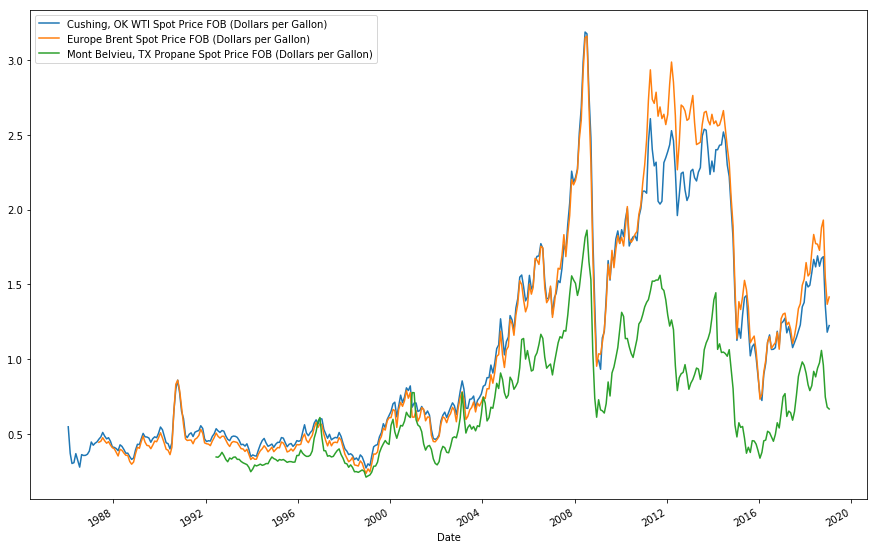

In [473]:
df_Propane  = ['Cushing, OK WTI Spot Price FOB (Dollars per Gallon)',\
                    'Europe Brent Spot Price FOB (Dollars per Gallon)',\
                   'Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)']
df_all[df_Propane].plot()


In [305]:
df_CurdeOil_Yesrly["diff"] = df_CurdeOil_Yesrly["Europe Brent Spot Price FOB (Dollars per Barrel)"] - \
                             df_CurdeOil_Yesrly["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]

Negative_Rate = df_CurdeOil_Yesrly[df_CurdeOil_Yesrly["diff"] < 0].count()/df_CurdeOil_Yesrly.count()
Negative_Rate

Europe Brent Spot Price FOB (Dollars per Barrel)       0.666667
Cushing, OK WTI Spot Price FOB (Dollars per Barrel)    0.647059
Cushing, OK WTI Spot Price FOB (Dollars per Gallon)    0.647059
diff                                                   0.666667
dtype: float64

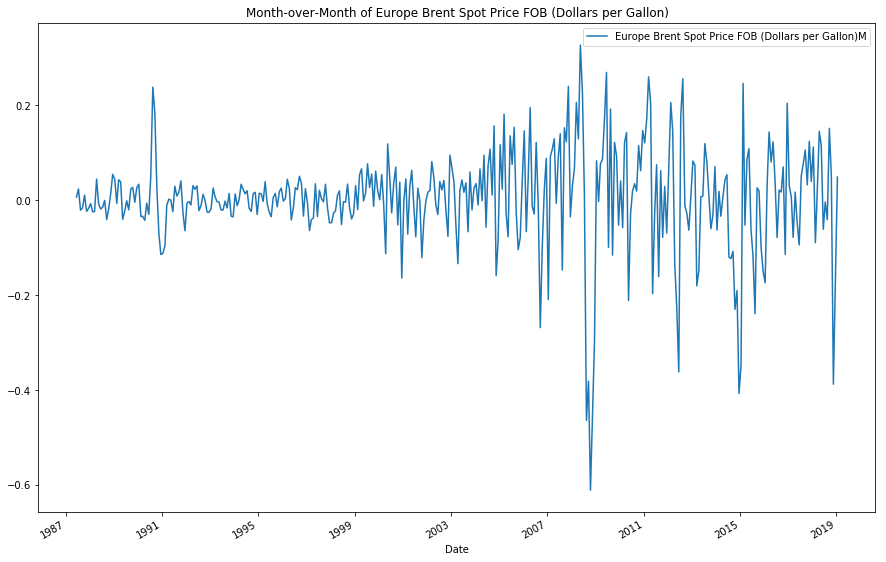

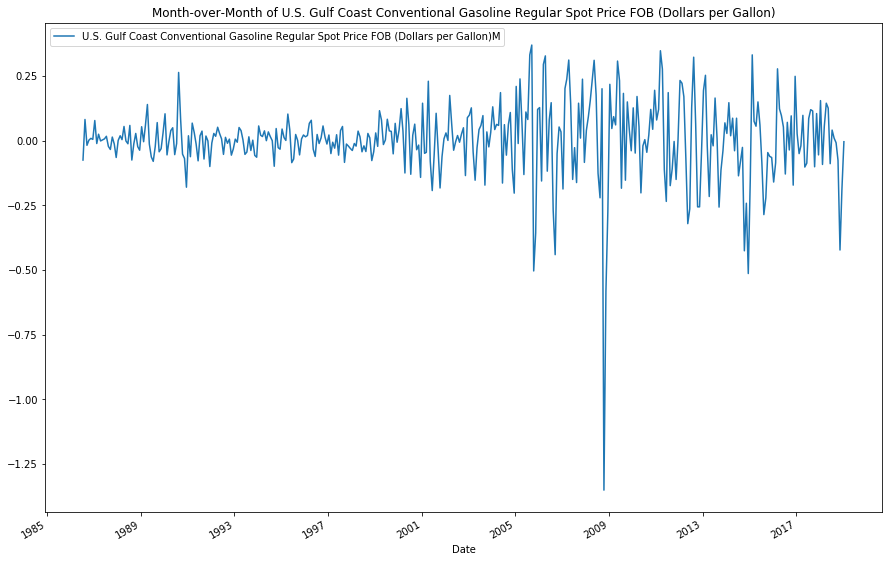

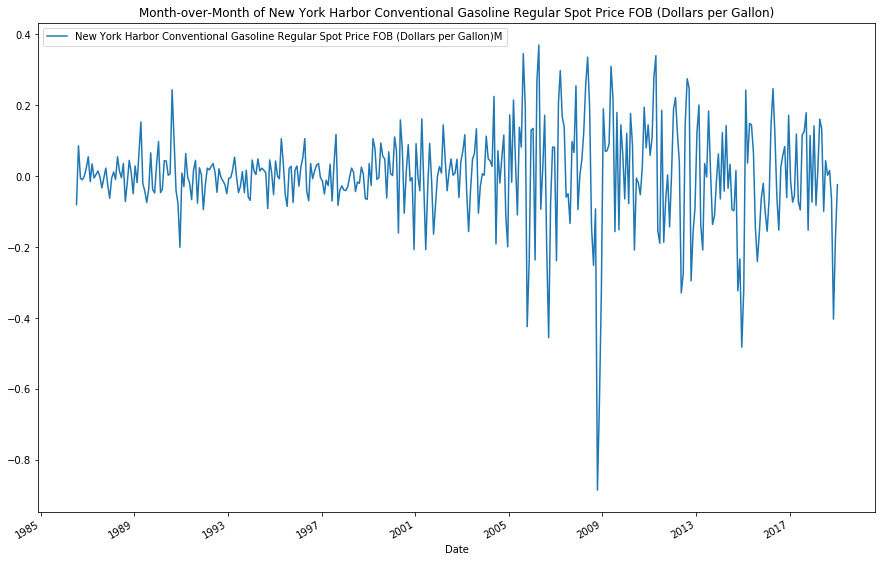

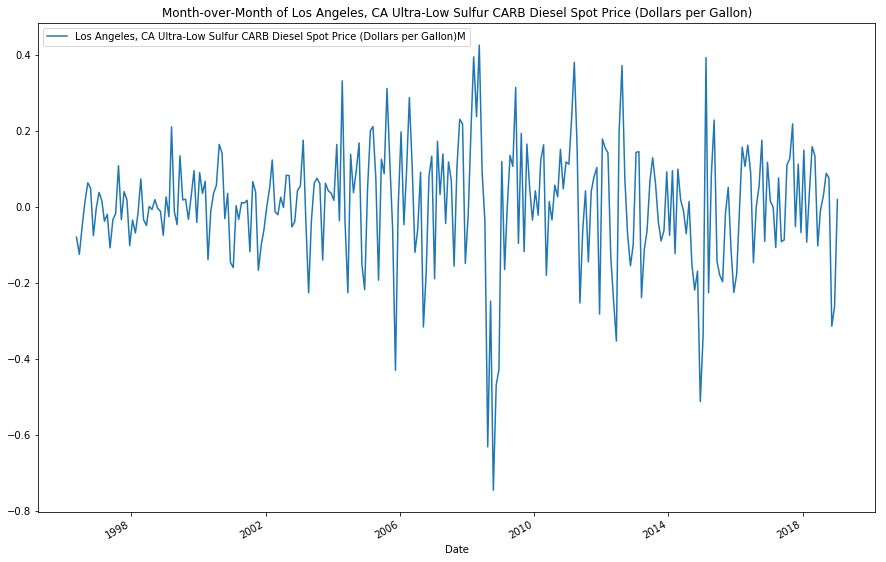

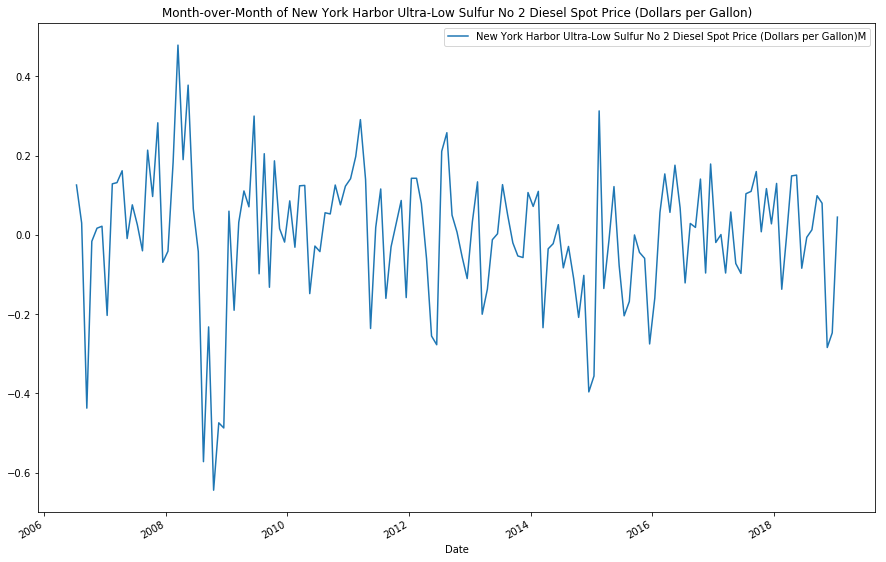

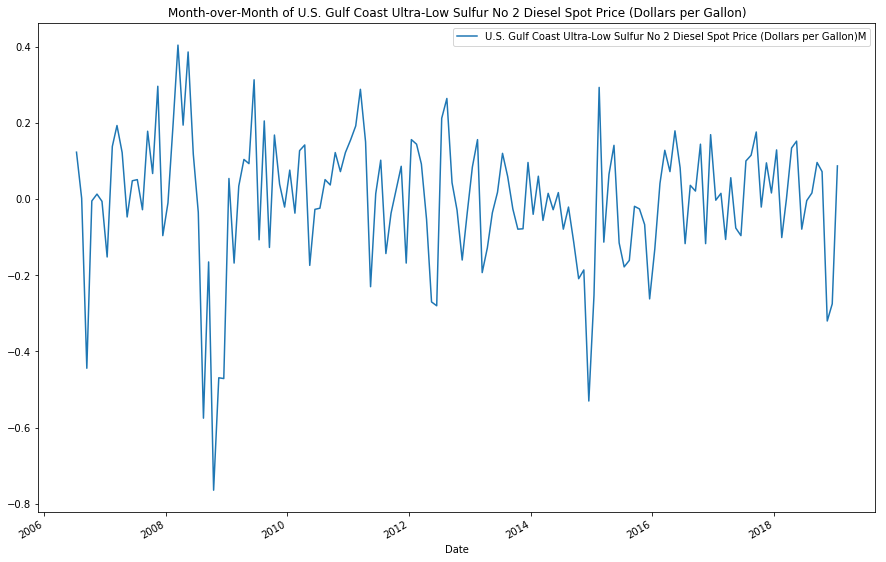

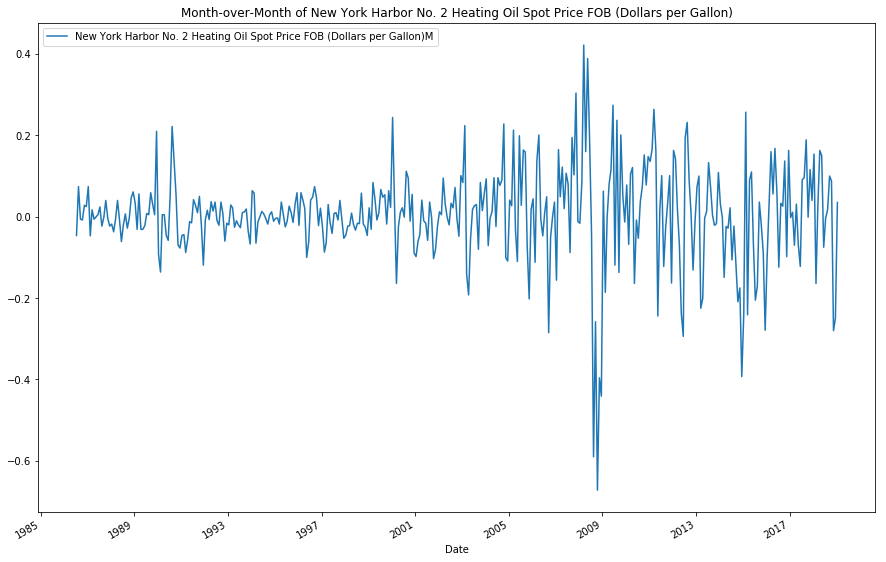

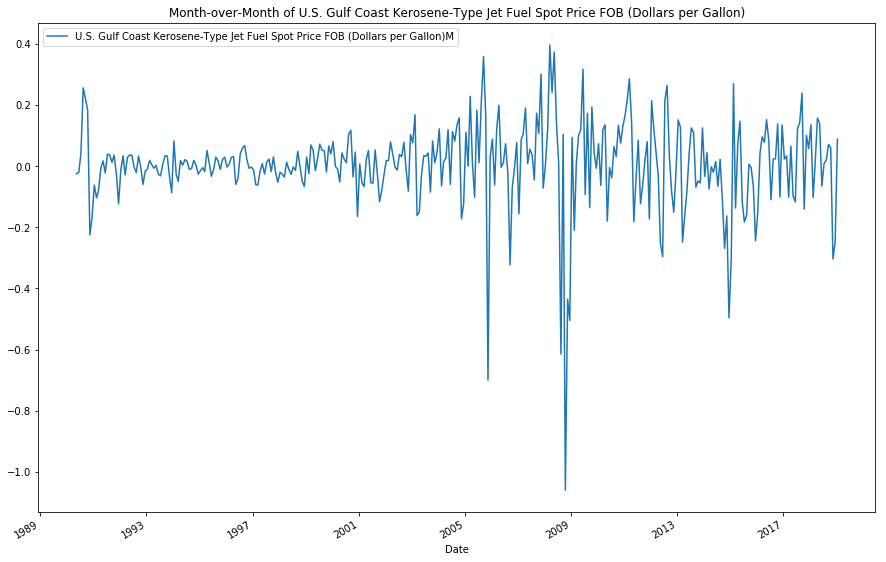

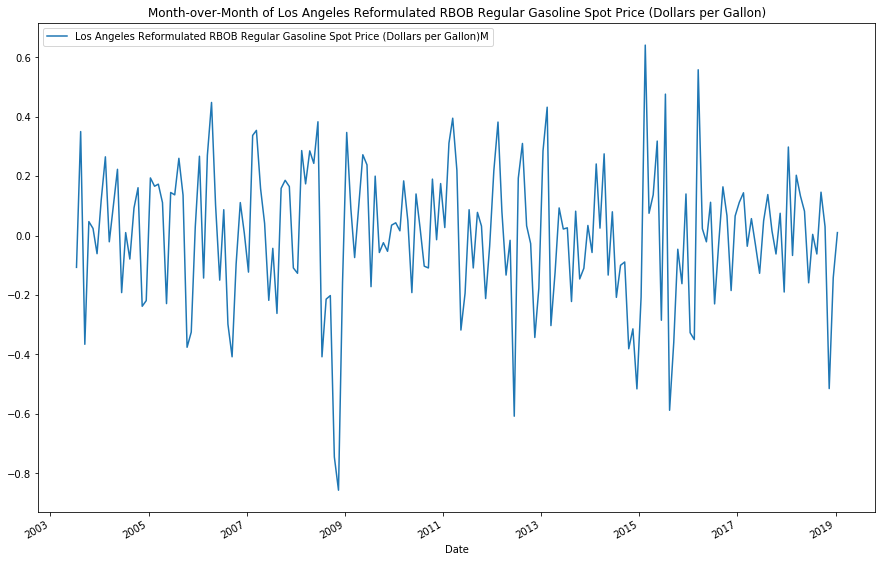

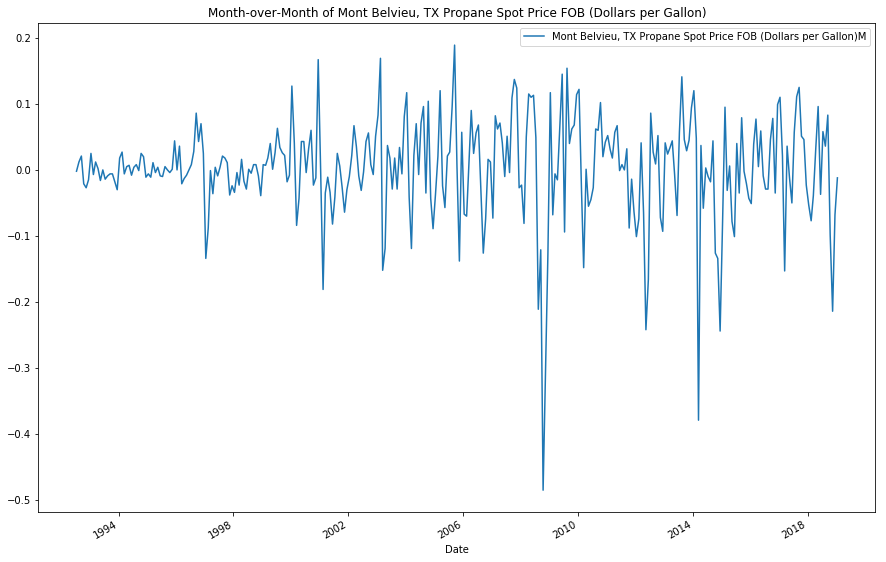

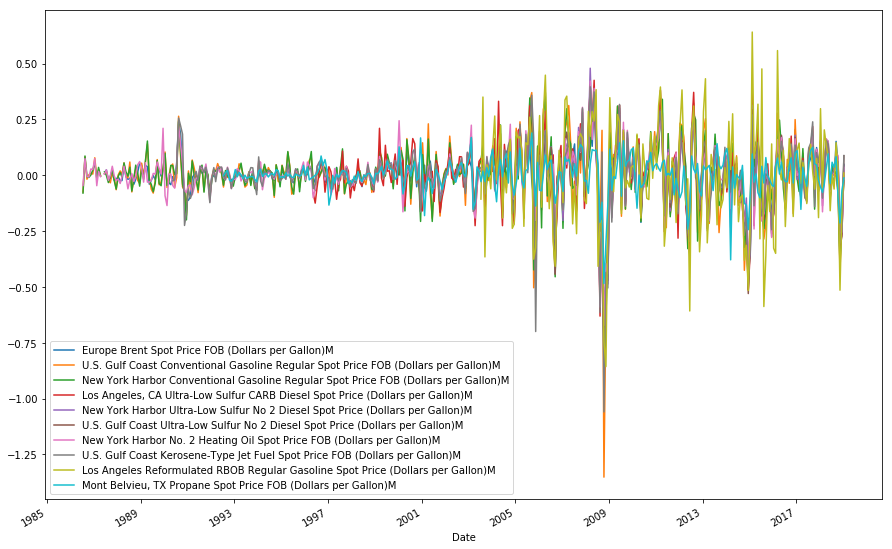

In [561]:
Brent_M = []
for i in brent :
    df_all[i + "M"] =df_all[i].diff()
    Brent_M.append(str(i) + "M")
    df_M = df_all[[i +"M"]]
    df_M = df_M[df_M[i+"M"].notnull()]
    #df_M = df_M.set_index("Date")
    df_M.plot()
    plt.title("Month-over-Month of " + str(i))

df_all[Brent_M].plot()

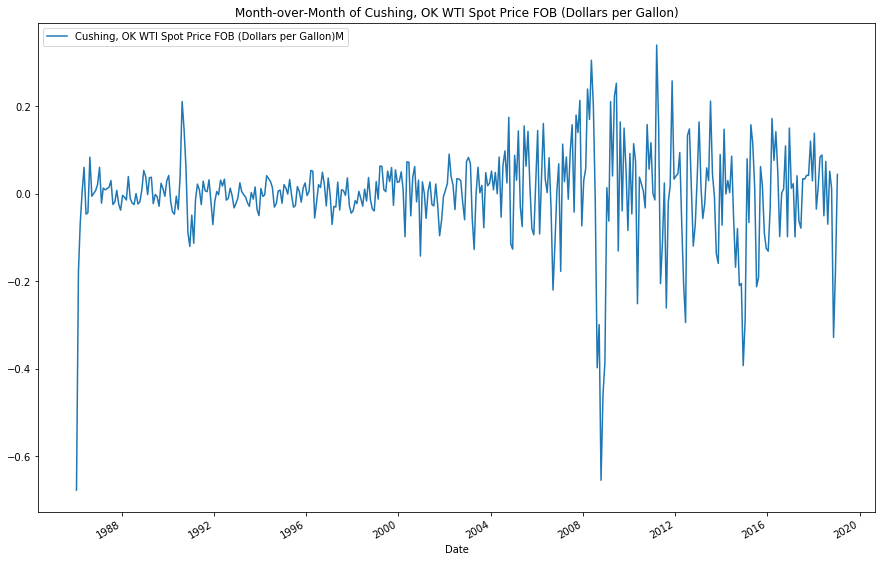

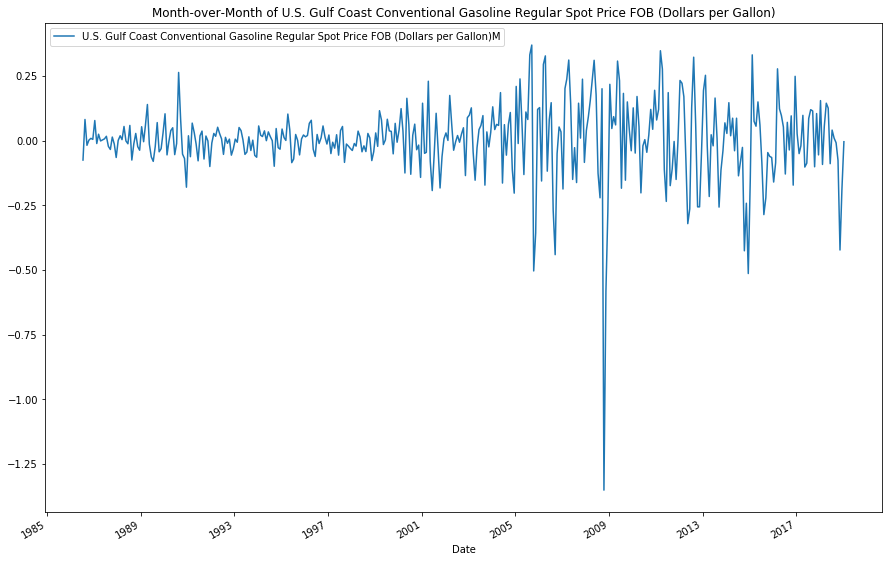

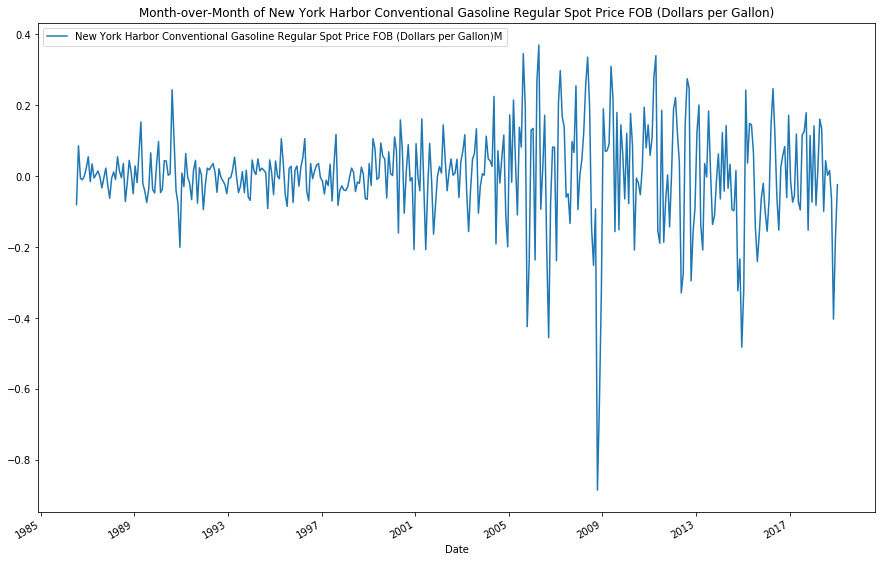

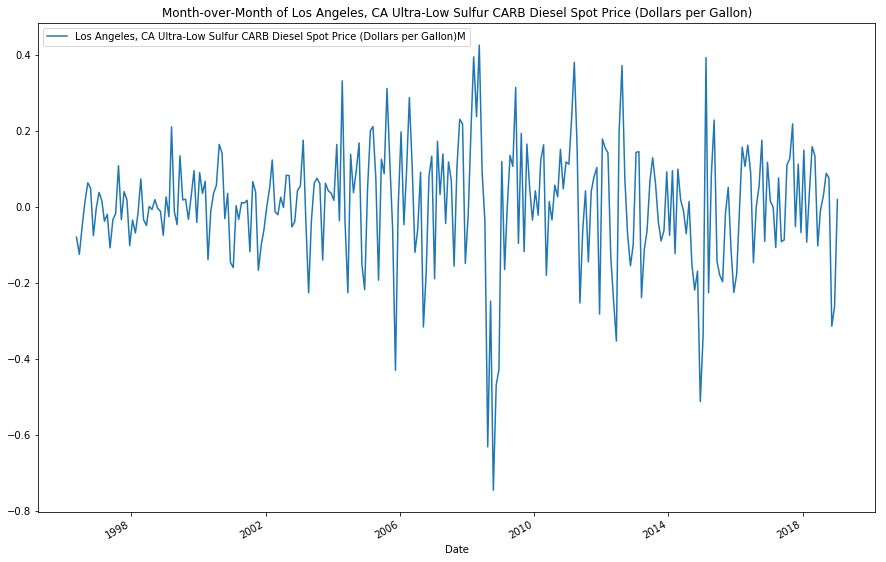

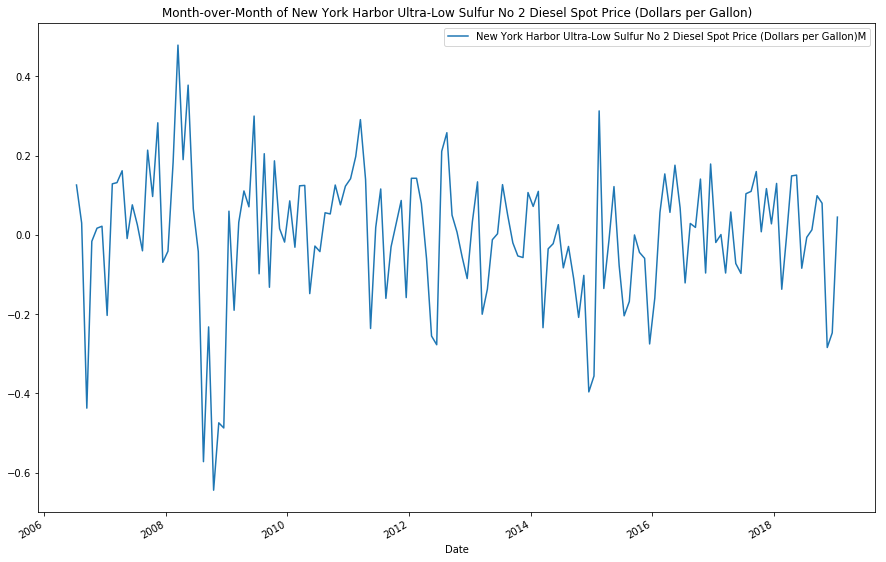

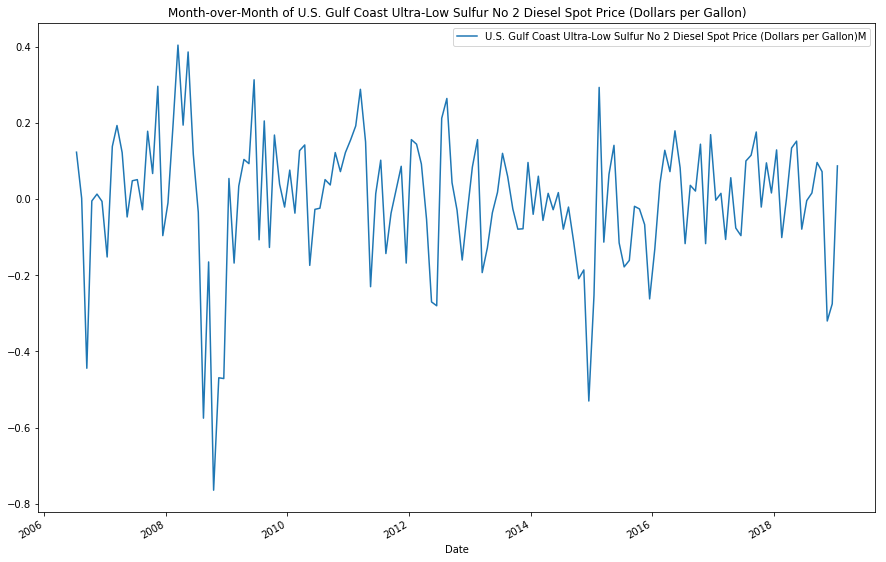

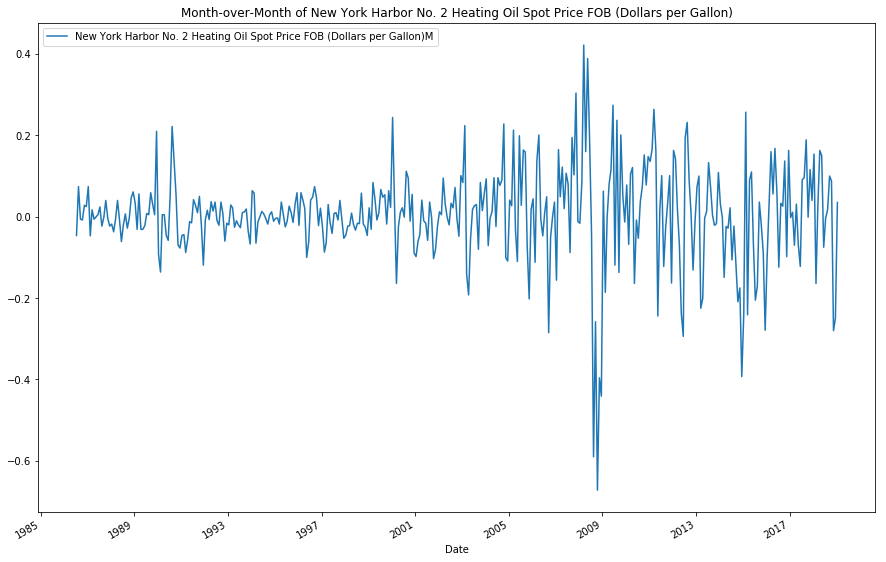

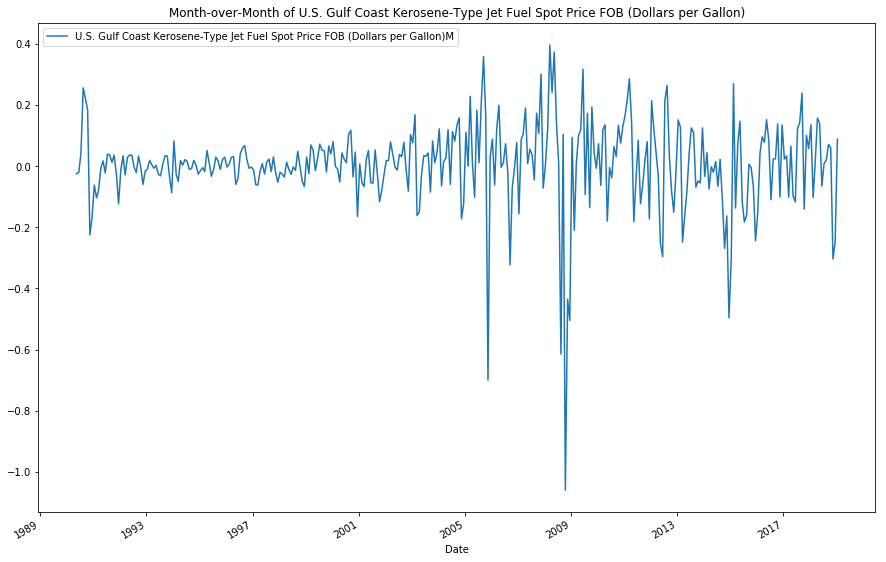

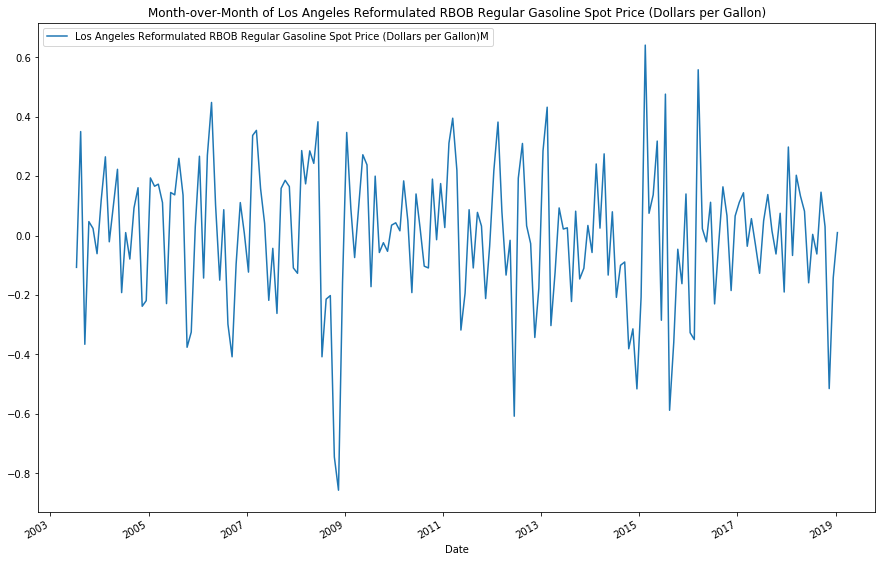

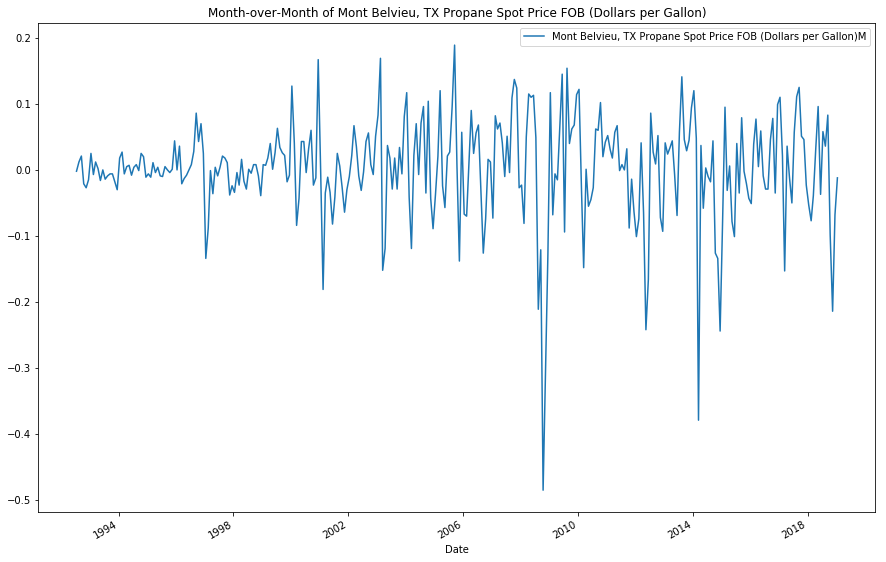

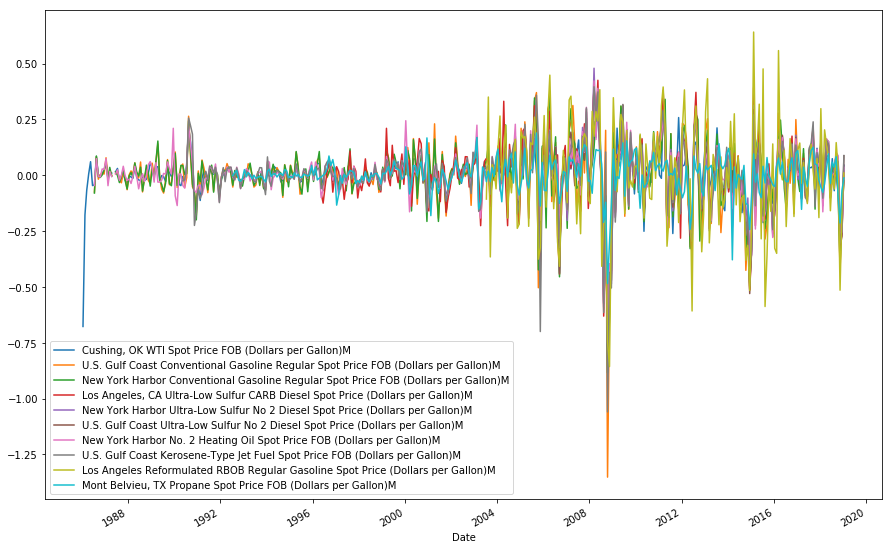

In [562]:
wti_M = []
for i in wti :
    df_all[i + "M"] =df_all[i].diff()
    wti_M.append(str(i) + "M")
    df_M = df_all[[i +"M"]]
    df_M = df_M[df_M[i+"M"].notnull()]
    #df_M = df_M.set_index("Date")
    df_M.plot()
    plt.title("Month-over-Month of " + str(i))

df_all[wti_M].plot()

In [564]:
df_all["Year"] =df_all.index
df_all["Year"] = df_all["Year"].astype('datetime64[Y]')
df_all = df_all.groupby("Year").sum()

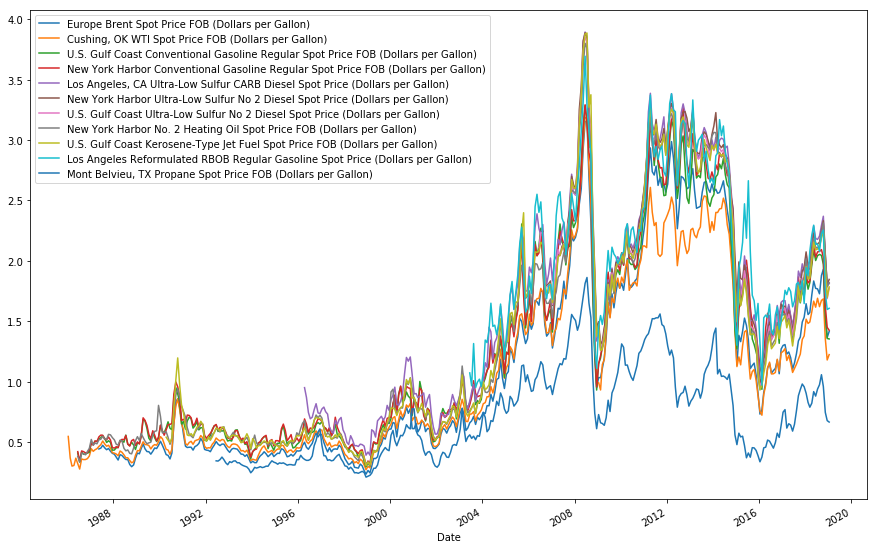

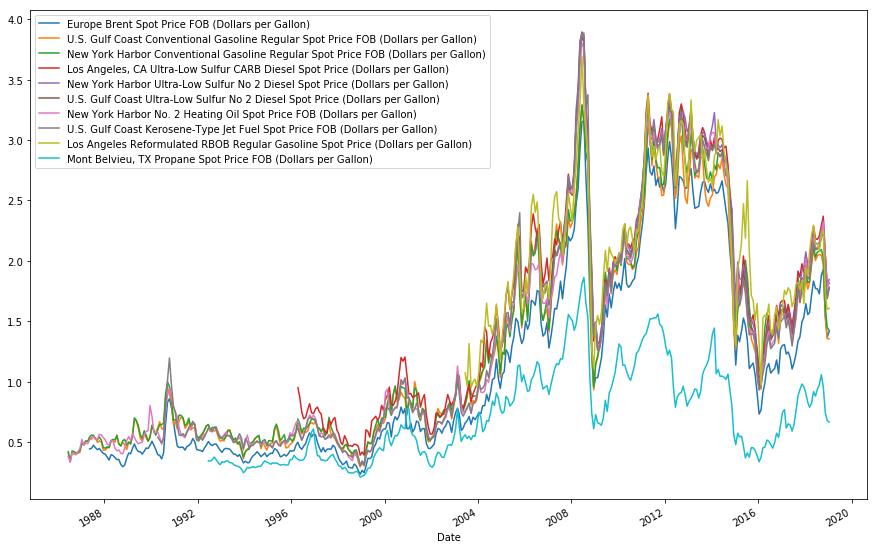

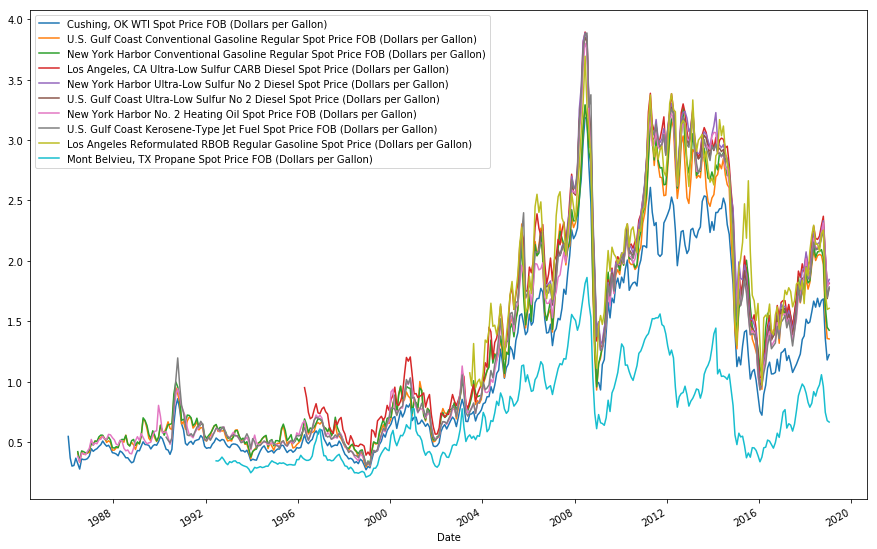

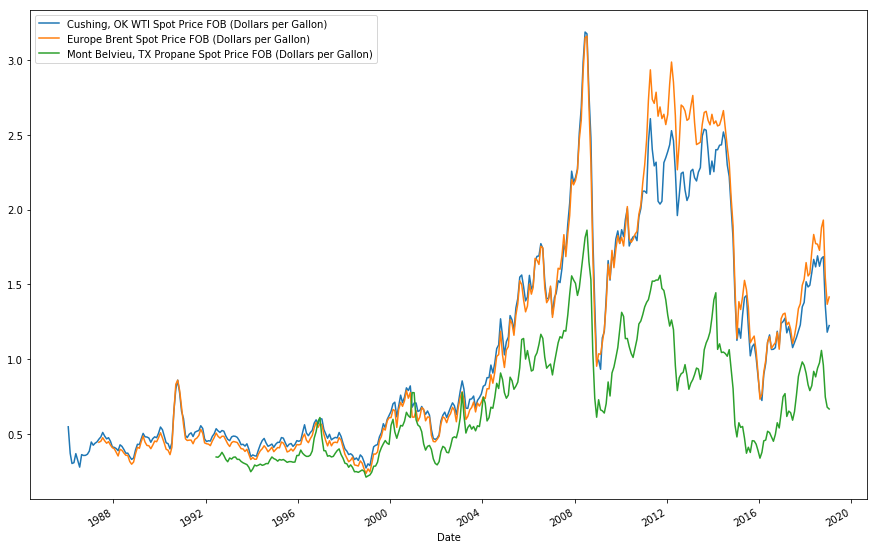

In [552]:
df_all[brent].plot()
df_all[wti].plot()
df_all[df_Propane].plot()

In [549]:
plot_acf(white_noise,lags=20)

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Europe Brent Spot Price FOB (Dollars per Barrel)  \
count                                        381.000000   
mean                                          46.000394   
std                                           33.013959   
min                                            9.820000   
25%                                           18.670000   
50%                                           30.200000   
75%                                           67.490000   
max                                          132.720000   

       Europe Brent Spot Price FOB (Dollars per Gallon)  \
count                                        381.000000   
mean                                           1.095247   
std                                            0.786047   
min                                            0.233810   
25%                                            0.444524   
50%                                            0.719048   
75%                                            1.606905   
max                                            3.160000   

       Cushing, OK WTI Spot Price FOB (Dollars per Barrel)  \
count                                         397.000000     
mean                                           43.808791     
std                                            29.460501     
min                                            11.350000     
25%                                            19.660000     
50%                                            29.840000     
75%                                            63.800000     
max                                           133.880000     

       Cushing, OK WTI Spot Price FOB (Dollars per Gallon)  \
count                                         397.000000     
mean                                            1.043066     
std                                             0.701441     
min                                             0.270238     
25%                                             0.468095     
50%                                             0.710476     
75%                                             1.519048     
max                                             3.187619     

       U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
count                                         392.000000                                   
mean                                            1.238556                                   
std                                             0.813193                                   
min                                             0.294000                                   
25%                                             0.548750                                   
50%                                             0.863500                                   
75%                                             1.866000                                   
max                                             3.284000                                   

       New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  \
count                                         392.000000                                   
mean                                            1.267541                                   
std                                             0.829709                                   
min                                             0.307000                                   
25%                                             0.556750                                   
50%                                             0.886500                                   
75%                                             1.919250                                   
max                                             3.292000                                   

       Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)  \
count                                         274.000000                        

In [567]:
al_ = ['Europe Brent Spot Price FOB (Dollars per Gallon)',
     'Cushing, OK WTI Spot Price FOB (Dollars per Gallon)',
     'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
     'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
     'Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)',        
     'New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
     'U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
     'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)',
     'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB (Dollars per Gallon)',
     'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)',
     'Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)']

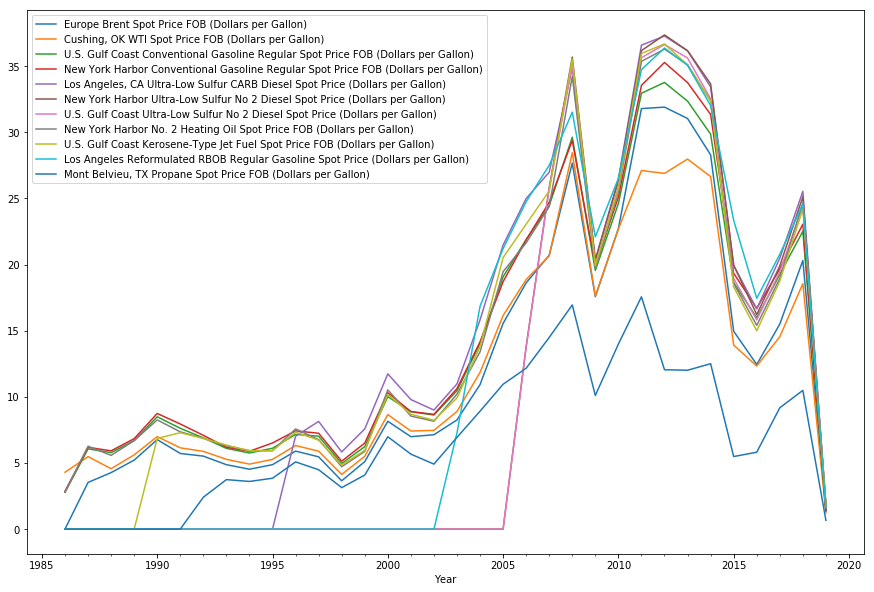

In [568]:
df_all[al_].plot()

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

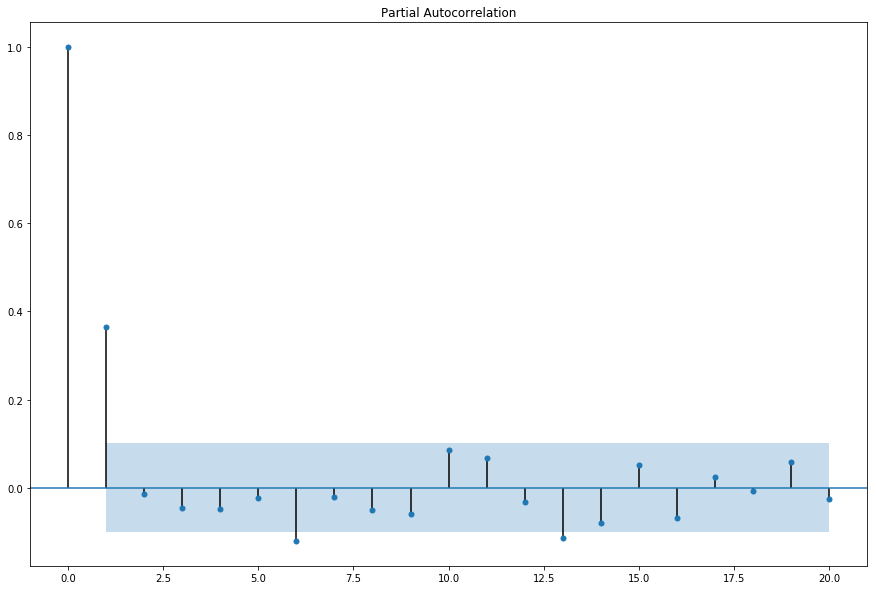

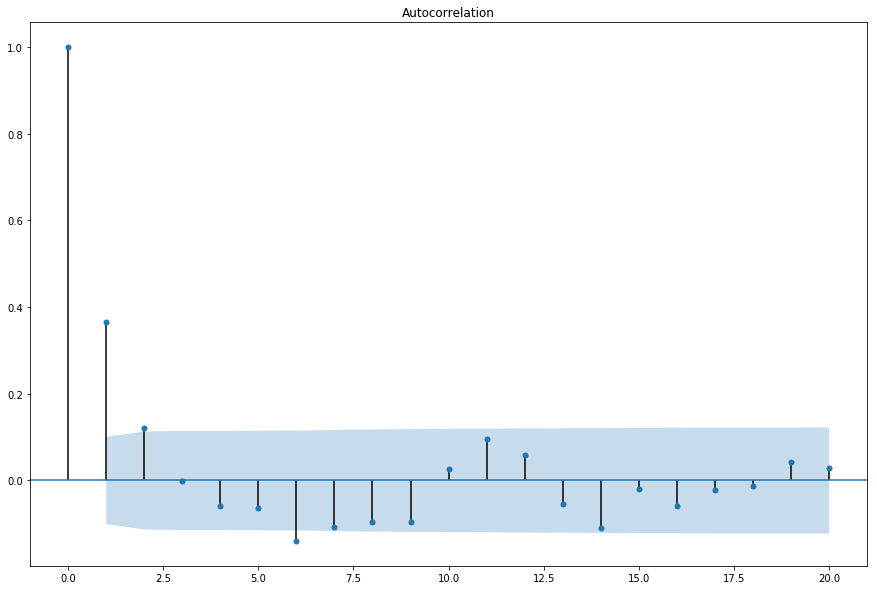

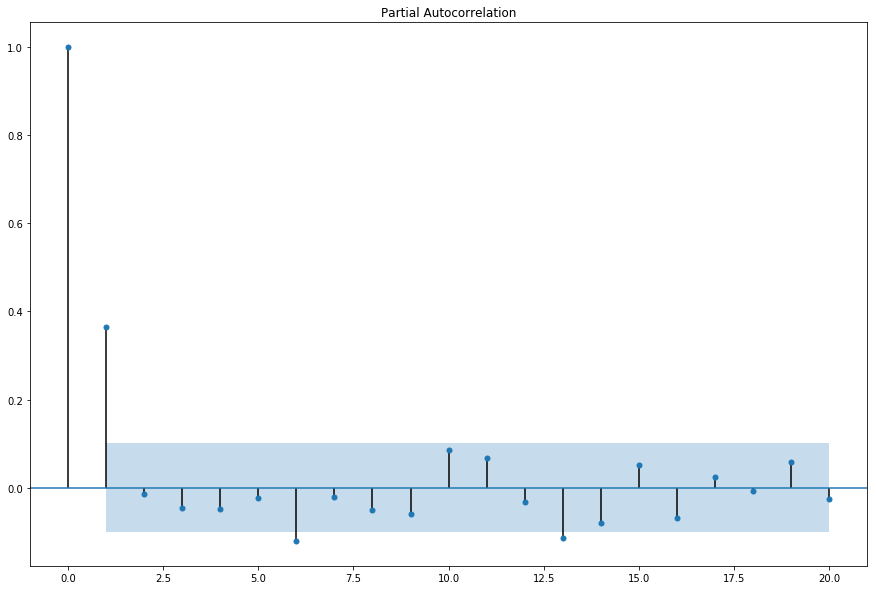

In [628]:
plot_acf(df1["Europe Brent Spot Price FOB (Dollars per Barrel)"].diff(1)[1:],lags=20)
plot_pacf(df1["Europe Brent Spot Price FOB (Dollars per Barrel)"].diff(1)[1:],lags=20)

In [718]:
df1["Europe Brent CO"] = df1["Europe Brent Spot Price FOB (Dollars per Barrel)"]
dataset = df1["Europe Brent CO"]

In [719]:
model = ARIMA(dataset, order=(2,1,2))

In [720]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Europe Brent CO   No. Observations:                  380
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1082.755
Method:                       css-mle   S.D. of innovations              4.179
Date:                Thu, 21 Feb 2019   AIC                           2177.510
Time:                        21:03:31   BIC                           2201.151
Sample:                             1   HQIC                          2186.891
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1227      0.210      0.585      0.559      -0.289       0.534
ar.L1.D.Europe Brent CO     1.3615      0.125     10.864      0.000       1.116       1.607
ar.L2.D.Europe Brent CO    -0.4735      0.131     -3.625      0.000      -0.729      -0.217
ma.L1.D.Europe Brent CO    -1.0072      0.141     -7.125      0.000      -1.284      -0.730
ma.L2.D.Europe Brent CO     0.1158      0.156      0.743      0.458      -0.190       0.421
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4377           -0.2121j            1.4533           -0.0233
AR.2            1.4377           +0.2121j            1.4533            0.0233
MA.1            1.1431           +0.0000j            1.1431            0.0000
MA.2            7.5550           +0.0000j            7.5550            0.0000
-----------------------------------------------------------------------------
"""

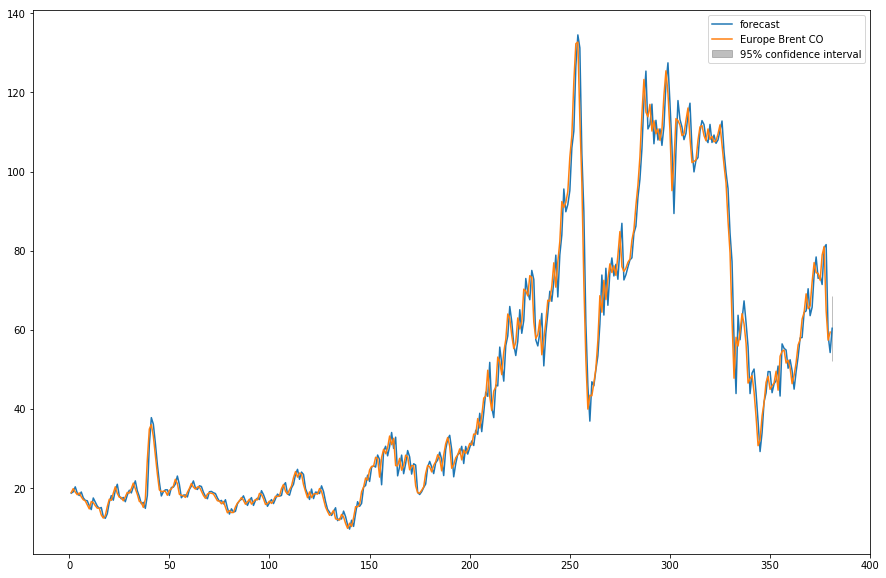

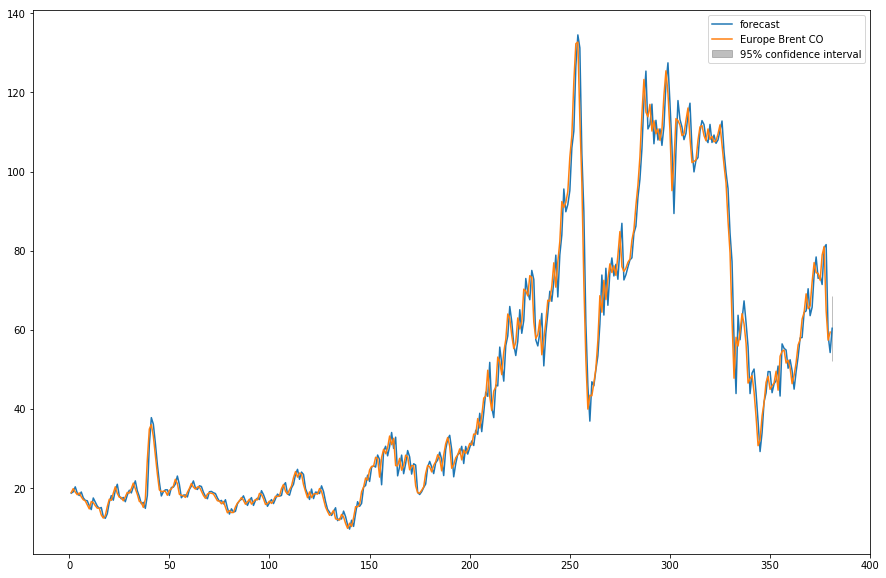

In [699]:
result.plot_predict(start=1, end=381)


In [669]:
date = df1["Date"].tolist()
date += [pd.Timestamp(2019, 2, 15),pd.Timestamp(2019, 3, 15),pd.Timestamp(2019, 4, 15),\
             pd.Timestamp(2019, 5, 15),pd.Timestamp(2019, 6, 15),pd.Timestamp(2019, 7, 15)]

In [43]:
Prediction = []
dataset = df1["Europe Brent Spot Price FOB (Dollars per Barrel)"]
for _ in range(6):
    model = ARIMA(dataset, order=(2,1,2))
    result = model.fit()
    pred = result.forecast()[0][0]
    print(pred)
    #print(pred.tolist()[-1] + dataset.tolist()[-1])
    Prediction.append(pred)
    ds = dataset.tolist()
    ds.append(pred)
    dataset = pd.Series(ds)

60.377522496687675
61.33593364058873
62.19641753558652
62.927896651220706
63.53011847622462
64.01743994542358


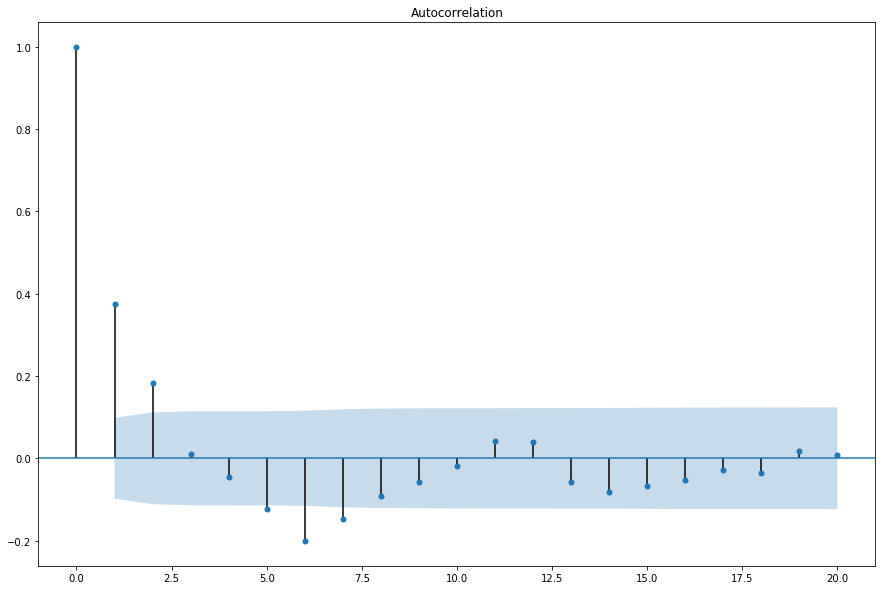

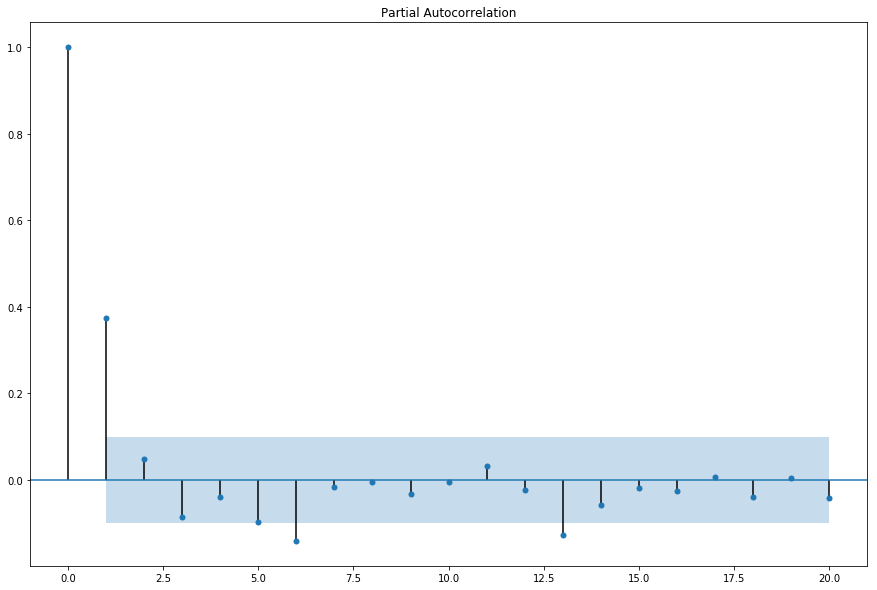

In [735]:
plot_acf(df2["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"].diff(1)[1:],lags=20)
plot_pacf(df2["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"].diff(1)[1:],lags=20)
plt.show()

In [41]:
Prediction = []
dataset = df2["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]
for _ in range(6):
    model = ARIMA(dataset, order=(2,1,2))
    result = model.fit()
    pred = result.forecast()[0][0]
    print(pred)
    #print(pred.tolist()[-1] + dataset.tolist()[-1])
    Prediction.append(pred)
    ds = dataset.tolist()
    ds.append(pred)
    dataset = pd.Series(ds)

52.66887601497839
53.68628827048873
53.833650310972175
53.95021446974295
54.02151725736429
54.09036124612806


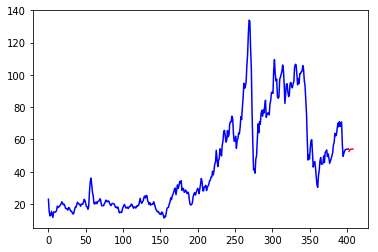

In [42]:
plt.plot(range(len(dataset)), dataset.tolist(), "b", range(len(dataset),len(dataset)+6), Prediction,"r")
plt.show()

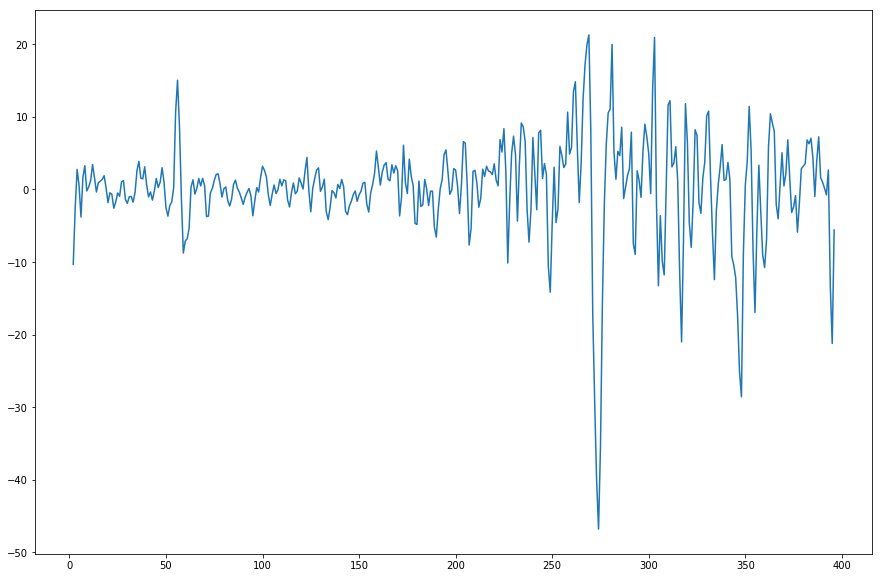

In [732]:
plt.plot(df2["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"].diff(2))

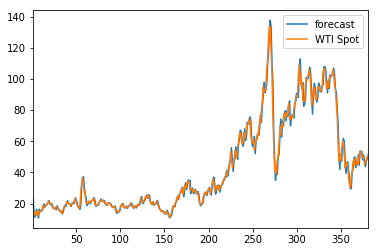

In [9]:
df2["WTI Spot"] = df2["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]
dataset = df2["WTI Spot"]
model = ARIMA(dataset, order=(2,1,1))
result = model.fit()
result.plot_predict(start=1, end=381)
plt.show()

In [743]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.WTI Spot   No. Observations:                  396
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1108.995
Method:                       css-mle   S.D. of innovations              3.980
Date:                Thu, 21 Feb 2019   AIC                           2227.990
Time:                        21:07:29   BIC                           2247.897
Sample:                             1   HQIC                          2235.876
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0613      0.335      0.183      0.855      -0.596       0.718
ar.L1.D.WTI Spot    -0.1382      0.323     -0.428      0.669      -0.771       0.495
ar.L2.D.WTI Spot     0.2489 

In [798]:
df2["WTI Spot"] = df2["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]
dataset = df2["WTI Spot"]
dataset

0      22.93
1      15.46
2      12.61
3      12.84
4      15.38
5      13.43
6      11.59
7      15.10
8      14.87
9      14.90
10     15.22
11     16.11
12     18.65
13     17.75
14     18.30
15     18.68
16     19.44
17     20.07
18     21.34
19     20.31
20     19.53
21     19.86
22     18.85
23     17.28
24     17.13
25     16.80
26     16.20
27     17.86
28     17.42
29     16.53
       ...  
367    44.72
368    45.18
369    49.78
370    45.66
371    51.97
372    52.50
373    53.47
374    49.33
375    51.06
376    48.48
377    45.18
378    46.63
379    48.04
380    49.82
381    51.58
382    56.64
383    57.88
384    63.70
385    62.23
386    62.73
387    66.25
388    69.98
389    67.87
390    70.98
391    68.06
392    70.23
393    70.75
394    56.96
395    49.52
396    51.38
Name: WTI Spot, Length: 397, dtype: float64

In [807]:
import numpy
numpy.corrcoef(df3["U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)"], df4["New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)"])

array([[1.        , 0.99802942],
       [0.99802942, 1.        ]])

In [808]:
df3

Date  \
0   1986-06-15   
1   1986-07-15   
2   1986-08-15   
3   1986-09-15   
4   1986-10-15   
5   1986-11-15   
6   1986-12-15   
7   1987-01-15   
8   1987-02-15   
9   1987-03-15   
10  1987-04-15   
11  1987-05-15   
12  1987-06-15   
13  1987-07-15   
14  1987-08-15   
15  1987-09-15   
16  1987-10-15   
17  1987-11-15   
18  1987-12-15   
19  1988-01-15   
20  1988-02-15   
21  1988-03-15   
22  1988-04-15   
23  1988-05-15   
24  1988-06-15   
25  1988-07-15   
26  1988-08-15   
27  1988-09-15   
28  1988-10-15   
29  1988-11-15   
..         ...   
362 2016-08-15   
363 2016-09-15   
364 2016-10-15   
365 2016-11-15   
366 2016-12-15   
367 2017-01-15   
368 2017-02-15   
369 2017-03-15   
370 2017-04-15   
371 2017-05-15   
372 2017-06-15   
373 2017-07-15   
374 2017-08-15   
375 2017-09-15   
376 2017-10-15   
377 2017-11-15   
378 2017-12-15   
379 2018-01-15   
380 2018-02-15   
381 2018-03-15   
382 2018-04-15   
383 2018-05-15   
384 2018-06-15   
385 2018-07-15   
386 2018-08-15   
387 2018-09-15   
388 2018-10-15   
389 2018-11-15   
390 2018-12-15   
391 2019-01-15   

     U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)  
0                                                0.409                                  
1                                                0.334                                  
2                                                0.416                                  
3                                                0.398                                  
4                                                0.400                                  
5                                                0.409                                  
6                                                0.414                                  
7                                                0.492                                  
8                                                0.481                                  
9                                                0.506                                  
10                                               0.505                                  
11                                               0.528                                  
12                                               0.535                                  
13                                               0.552                                  
14                                               0.530                                  
15                                               0.496                                  
16                                               0.510                                  
17                                               0.497                                  
18                                               0.432                                  
19                                               0.433                                  
20                                               0.452                                  
21                                               0.456                                  
22                                               0.511                                  
23                                               0.510                                  
24                                               0.498                                  
25                                               0.557                                  
26                                               0.482                                  
27                                               0.470                                  
28                                               0.498                                  
29                                               0.475                                  
..                                                 ...                                  
362                                          